In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

C:\Users\roi_y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


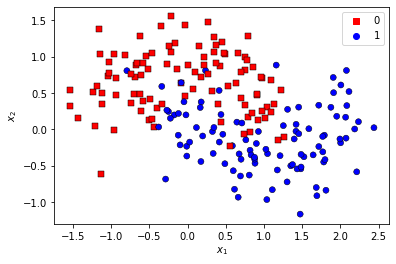

In [4]:
import seaborn as sns

sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('figures/moons.pdf')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()

In [5]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier([('log', clf1), ('knn', clf2), ('dt', clf3)], 
                            voting='soft')

In [6]:
from sklearn.model_selection import cross_val_score

names = ['Logistic Regression', 'Gaussian NB', 'Decision Tree', 'Ensemble']
classifiers = [clf1, clf2, clf3, ensemble]

for clf, name in zip(classifiers, names):
    scores = cross_val_score(clf, X, y, cv=5)
    print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]')

Accuracy: 0.830 (+/- 0.051) [Logistic Regression]
Accuracy: 0.840 (+/- 0.046) [Gaussian NB]
Accuracy: 0.840 (+/- 0.041) [Decision Tree]
Accuracy: 0.885 (+/- 0.037) [Ensemble]


In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, ax, title, h=0.02):  
    colors = ['r', 'b']
    cmap = ListedColormap(colors)
      
    # Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot also the sample points
    sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, 
                    palette=colors, markers=('s', 'o'), edgecolor='black', ax=ax)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    ax.legend()    

C:\Users\roi_y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roi_y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roi_y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roi_y\anacond

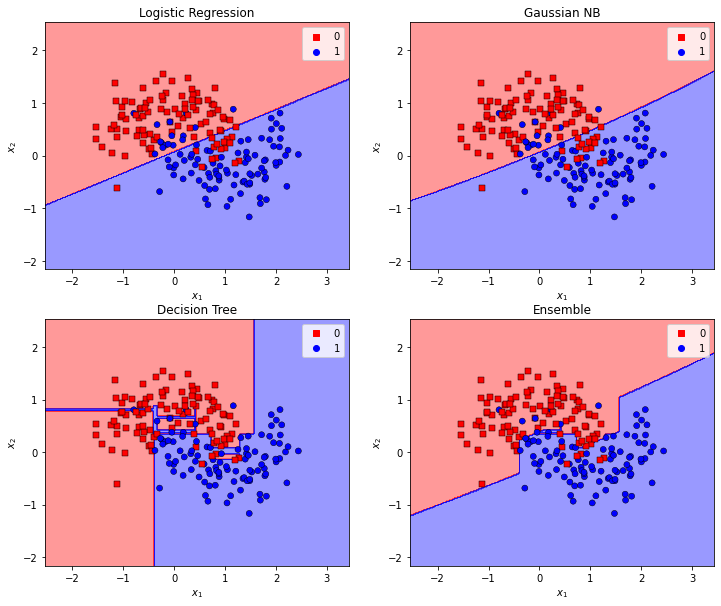

In [8]:
feature_names = ['$x_1$', '$x_2$']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flat
k = 0

for clf, name in zip(classifiers, names):
    clf.fit(X, y)
    plot_decision_boundaries(clf, X, y, feature_names, ax=axes[k], title=name)
    k += 1
    
plt.savefig('figures/voting_classifier.pdf')